<a href="https://colab.research.google.com/github/wathsan11/Rextro-NILM-Project/blob/main/NILM_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content.drive')

Mounted at /content.drive


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 45

In [10]:
df = pd.read_csv('/content.drive/MyDrive/Machine Learning/NILM.csv')
df.head()

,voltage,current,active_power,reactive_power,apparent_power,power_factor,timestamp,reliable,device_id,load_type,probe_id,frequency,energy,temperature,bulb,fan,iron,labels
0,233.67,0.427060,84.82254,52.56829,99.79122,0.85,2025-12-09T19:02:50.725756,False,power_monitor_1,unknown,default,50,0,25,1,0,0,1
1,233.67,0.435269,86.45290,53.57870,101.70930,0.85,2025-12-09T19:02:53.781784,False,power_monitor_1,unknown,default,50,0,25,1,0,0,1
2,233.67,0.451382,89.65333,55.56215,105.47450,0.85,2025-12-09T19:02:56.810625,False,power_monitor_1,unknown,default,50,0,25,1,0,0,1
3,233.67,0.457015,90.77206,56.25548,106.79070,0.85,2025-12-09T19:02:59.867042,False,power_monitor_1,unknown,default,50,0,25,1,0,0,1
4,233.67,0.445174,88.42026,54.79794,104.02380,0.85,2025-12-09T19:03:02.925509,False,power_monitor_1,unknown,default,50,0,25,1,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   voltage         3200 non-null   float64
 1   current         3200 non-null   float64
 2   active_power    3200 non-null   float64
 3   reactive_power  3200 non-null   float64
 4   apparent_power  3200 non-null   float64
 5   power_factor    3200 non-null   float64
 6   timestamp       3200 non-null   object 
 7   reliable        3200 non-null   bool   
 8   device_id       3200 non-null   object 
 9   load_type       3200 non-null   object 
 10  probe_id        3200 non-null   object 
 11  frequency       3200 non-null   int64  
 12  energy          3200 non-null   int64  
 13  temperature     3200 non-null   int64  
 14  bulb            3200 non-null   int64  
 15  fan             3200 non-null   int64  
 16  iron            3200 non-null   int64  
 17  labels          3200 non-null   i

Data preprocessing

In [19]:
x = df.drop(['timestamp','reliable','device_id','load_type','probe_id','frequency','energy','temperature','bulb','fan','iron','labels'],axis = 1)
y = df.labels

In [20]:
x.head()

,voltage,current,active_power,reactive_power,apparent_power,power_factor
0,233.67,0.427060,84.82254,52.56829,99.79122,0.85
1,233.67,0.435269,86.45290,53.57870,101.70930,0.85
2,233.67,0.451382,89.65333,55.56215,105.47450,0.85
3,233.67,0.457015,90.77206,56.25548,106.79070,0.85
4,233.67,0.445174,88.42026,54.79794,104.02380,0.85


In [21]:
x.tail()

,voltage,current,active_power,reactive_power,apparent_power,power_factor
3195,233.67,0.535922,106.4445,65.96838,125.2289,0.85
3196,233.67,4.568364,1014.1150,333.32370,1067.4900,0.95
3197,233.67,4.605721,1022.4080,336.04920,1076.2190,0.95
3198,233.67,0.544402,108.1289,67.01224,127.2104,0.85
3199,233.67,0.551037,109.4467,67.82897,128.7608,0.85


In [22]:
y.head()

,labels
0,1
1,1
2,1
3,1
4,1


In [23]:
x.isnull().sum()

,0
voltage,0
current,0
active_power,0
reactive_power,0
apparent_power,0
power_factor,0


In [25]:
from sklearn.model_selection import train_test_split

x_train,x_,y_train,y_ = train_test_split(x,y,test_size = 0.4,random_state = RANDOM_STATE)
x_cv,x_test,y_cv,y_test = train_test_split(x_,y_,test_size = 0.5,random_state = RANDOM_STATE)
del x_,y_

In [26]:
x_train.head()

,voltage,current,active_power,reactive_power,apparent_power,power_factor
1590,233.67,0.518656,103.01520,63.84310,121.19440,0.85
2983,233.67,0.531287,105.52390,65.39784,124.14580,0.85
2133,233.67,0.215326,42.76791,26.50517,50.31519,0.85
1779,233.67,0.522640,103.80640,64.33344,122.12520,0.85
3073,233.67,4.646300,1031.41600,339.00990,1085.70100,0.95


In [27]:
y_train.head()

,labels
1590,3
2983,7
2133,6
1779,3
3073,7


Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [43]:
min_samples_split_list = [2,10,30,50,100,200,300,400,500,700]
max_depth_list =[2,4,5,6,7,8,16,32,64,None]
n_estimators_list = [10,50,100,200,300,500]

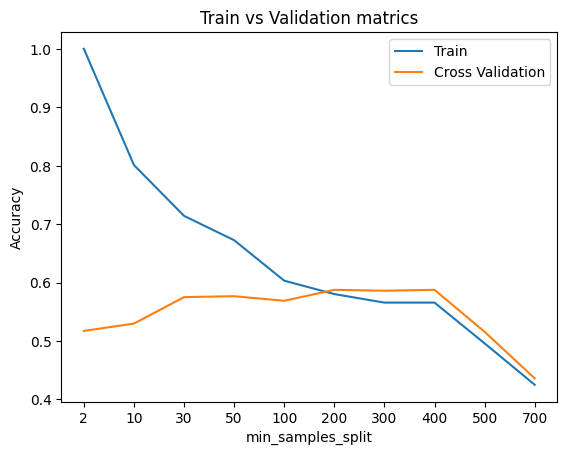

In [38]:
#Best min_sample_split


accuracy_list_train =[]
accuracy_list_cv =[]

for min_samples_split in min_samples_split_list:
  model = RandomForestClassifier(min_samples_split=min_samples_split,random_state=RANDOM_STATE).fit(x_train,y_train)
  prediction_train = model.predict(x_train)
  prediction_cv = model.predict(x_cv)
  accuracy_train =accuracy_score(y_train,prediction_train)
  accuracy_cv = accuracy_score(y_cv,prediction_cv)
  accuracy_list_train.append(accuracy_train)
  accuracy_list_cv.append(accuracy_cv)

plt.title('Train vs Validation matrics')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.xticks(ticks= range(len(min_samples_split_list)),labels=min_samples_split_list)
plt.plot(accuracy_list_train,label='Train')
plt.plot(accuracy_list_cv,label='Cross Validation')
plt.legend()
plt.show()


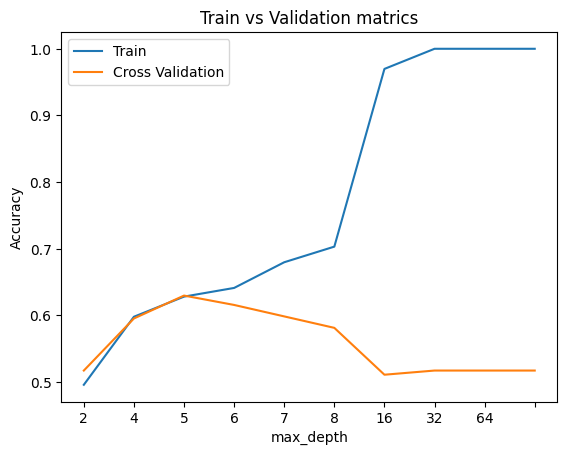

In [41]:
#Best max_depth

accuracy_list_train =[]
accuracy_list_cv =[]

for max_depth in max_depth_list:
  model = RandomForestClassifier(max_depth=max_depth,random_state=RANDOM_STATE).fit(x_train,y_train)
  prediction_train = model.predict(x_train)
  prediction_cv = model.predict(x_cv)
  accuracy_train =accuracy_score(y_train,prediction_train)
  accuracy_cv = accuracy_score(y_cv,prediction_cv)
  accuracy_list_train.append(accuracy_train)
  accuracy_list_cv.append(accuracy_cv)

plt.title('Train vs Validation matrics')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(ticks= range(len(max_depth_list)),labels=max_depth_list)
plt.plot(accuracy_list_train,label='Train')
plt.plot(accuracy_list_cv,label='Cross Validation')
plt.legend()

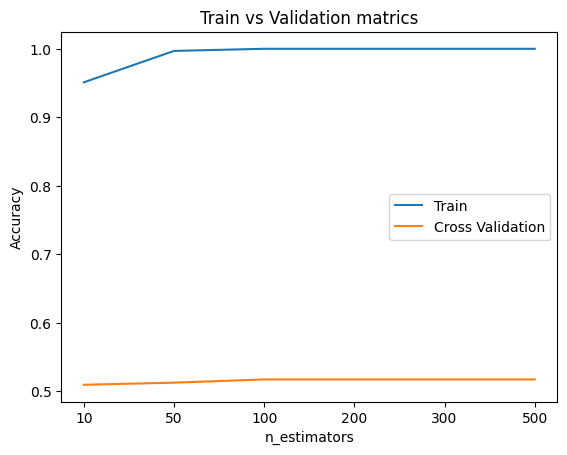

In [44]:
#Best no: of estimators

accuracy_list_train =[]
accuracy_list_cv =[]

for n_estimators in n_estimators_list:
  model = RandomForestClassifier(n_estimators=n_estimators,random_state=RANDOM_STATE).fit(x_train,y_train)
  prediction_train = model.predict(x_train)
  prediction_cv = model.predict(x_cv)
  accuracy_train =accuracy_score(y_train,prediction_train)
  accuracy_cv = accuracy_score(y_cv,prediction_cv)
  accuracy_list_train.append(accuracy_train)
  accuracy_list_cv.append(accuracy_cv)

plt.title('Train vs Validation matrics')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks= range(len(n_estimators_list)),labels=n_estimators_list)
plt.plot(accuracy_list_train,label='Train')
plt.plot(accuracy_list_cv,label='Cross Validation')
plt.legend()

In [67]:
#Random Forest Model

Random_forest_model = RandomForestClassifier(n_estimators=300,max_depth=5,min_samples_split=200).fit(x_train,y_train)

print(f"""Metrics train:
	Accuracy score: {accuracy_score(Random_forest_model.predict(x_train),y_train):.4f}
Metrics cv:
	Accuracy score: {accuracy_score(Random_forest_model.predict(x_cv),y_cv):.4f}
Metrics test:
	Accuracy score: {accuracy_score(Random_forest_model.predict(x_test),y_test):.4f}""")

Metrics train:
	Accuracy score: 0.5823
Metrics cv:
	Accuracy score: 0.5828
Metrics test:
	Accuracy score: 0.5719
